In [1]:
from fastai.vision.all import *

In [2]:
import os

In [3]:
from PIL import Image

In [4]:
training_path = r"D:\ComputerVision\archive\train\Training_data"

In [6]:
files = get_image_files(training_path)
(files)

(#557) [Path('D:/ComputerVision/archive/train/Training_data/cat_10.jpg'),Path('D:/ComputerVision/archive/train/Training_data/cat_100.jpg'),Path('D:/ComputerVision/archive/train/Training_data/cat_101.jpg'),Path('D:/ComputerVision/archive/train/Training_data/cat_102.jpg'),Path('D:/ComputerVision/archive/train/Training_data/cat_103.jpg'),Path('D:/ComputerVision/archive/train/Training_data/cat_104.jpg'),Path('D:/ComputerVision/archive/train/Training_data/cat_11.jpg'),Path('D:/ComputerVision/archive/train/Training_data/cat_111.jpg'),Path('D:/ComputerVision/archive/train/Training_data/cat_12.jpg'),Path('D:/ComputerVision/archive/train/Training_data/cat_120.jpg')...]

In [7]:
def label_func(f):
    return f.startswith("cat")

In [12]:
label_func(files[0])

AttributeError: 'WindowsPath' object has no attribute 'startswith'

In [8]:
dls = ImageDataLoaders.from_name_func(training_path, files, label_func, item_tfms=Resize(224))

In [9]:
dls

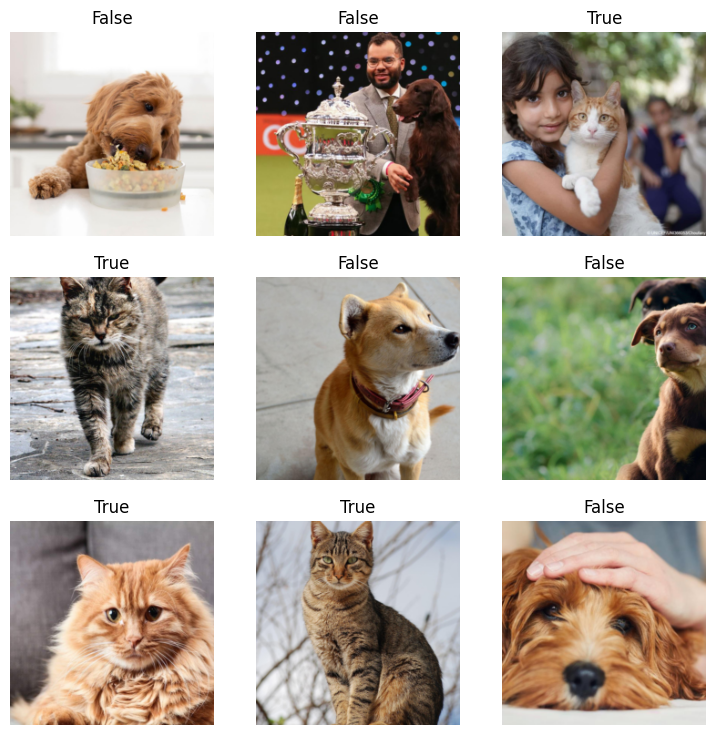

In [10]:
dls.show_batch()

In [33]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to C:\Users\hp/.cache\torch\hub\checkpoints\resnet34-b627a593.pth
100%|██████████████████████████████████████████████████████████████████████████████| 83.3M/83.3M [03:13<00:00, 452kB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.726126,0.345969,0.135135,01:04


epoch,train_loss,valid_loss,error_rate,time
0,0.203328,0.049138,0.009009,01:30
1,0.128461,0.049287,0.027027,01:32


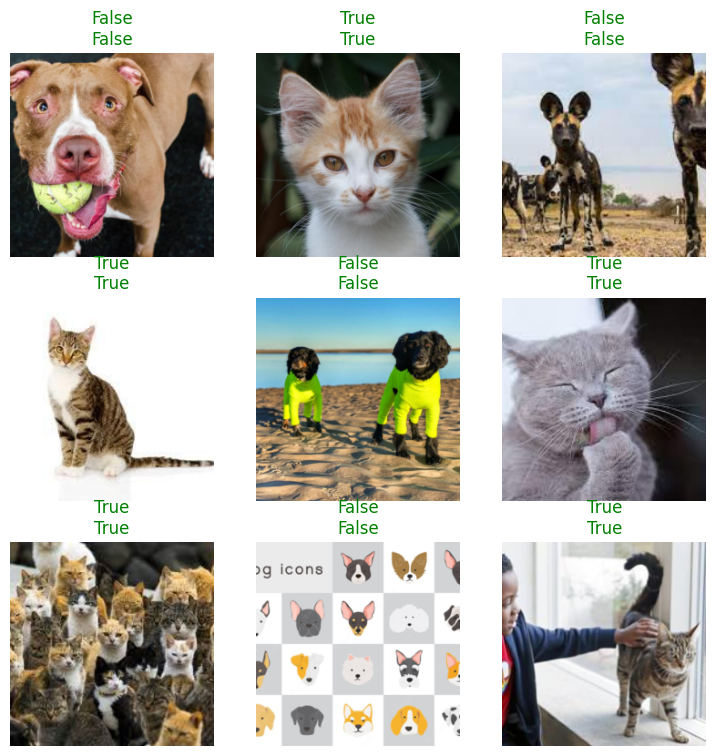

In [34]:
learn.show_results()

In [54]:
testing_path = r"D:\ComputerVision\archive\test\testing_data"

In [55]:
files = get_image_files(training_path)
len(files)

557

In [56]:
learn.predict(files[0])

('True', tensor(1), tensor([9.9960e-07, 1.0000e+00]))

In [57]:
img1 = Image.open(files[0])

In [58]:
img1.show()

In [59]:
learn.predict(files[555])

('False', tensor(0), tensor([1.0000e+00, 4.8807e-07]))

In [60]:
img2 = Image.open(files[555])
img2.show()